## exploration player table

In [1]:
import pandas as pd 
import sqlite3

In [2]:
conn =sqlite3.connect("/home/rajarabii/projects/Football Européen avec le machine learning/BD/database.sqlite")

cursor = conn.cursor()


In [3]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## ***Comprendre et Préparer les Données***

In [4]:
table_match = pd.read_sql('select * from match',conn)
table_player = pd.read_sql('select * from player',conn)
table_player_attribute = pd.read_sql('select * from Player_Attributes',conn)
table_league = pd.read_sql('select * from League',conn)
table_country = pd.read_sql('select * from country',conn)
table_team = pd.read_sql('select * from team',conn)
table_team_attribute = pd.read_sql('select * from Team_Attributes',conn)



In [5]:
table_player_attribute[table_player_attribute['player_api_id']==30981]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
102482,102483,158023,30981,2015-12-17 00:00:00,94.0,94.0,left,medium,low,80.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102483,102484,158023,30981,2015-10-16 00:00:00,94.0,94.0,left,medium,low,80.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102484,102485,158023,30981,2015-09-21 00:00:00,94.0,95.0,left,medium,low,80.0,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
102485,102486,158023,30981,2015-06-26 00:00:00,93.0,93.0,left,medium,low,84.0,...,90.0,74.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102486,102487,158023,30981,2015-03-13 00:00:00,93.0,95.0,left,medium,low,84.0,...,90.0,74.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102487,102488,158023,30981,2015-02-20 00:00:00,93.0,95.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102488,102489,158023,30981,2015-01-23 00:00:00,93.0,95.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102489,102490,158023,30981,2014-10-17 00:00:00,93.0,95.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102490,102491,158023,30981,2014-09-18 00:00:00,93.0,95.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0
102491,102492,158023,30981,2014-04-25 00:00:00,94.0,97.0,left,medium,low,84.0,...,90.0,76.0,25.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0


# analyser player 

In [6]:
table_match.head(200)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,2008/2009,29,2009-04-11 00:00:00,493067,9986,9996,1,...,3.50,2.00,3.25,3.40,2.00,3.25,3.40,2.00,3.20,3.40
196,197,1,1,2008/2009,29,2009-04-11 00:00:00,493068,9984,4049,4,...,8.00,1.40,4.00,7.00,1.40,4.00,7.00,1.40,4.00,7.00
197,198,1,1,2008/2009,29,2009-04-12 00:00:00,493069,9991,10001,2,...,4.25,1.70,3.40,4.50,1.75,3.40,4.25,1.80,3.30,4.00
198,199,1,1,2008/2009,3,2008-08-30 00:00:00,492491,8635,8571,4,...,11.00,1.22,5.00,10.00,1.25,5.00,9.00,1.25,5.00,9.00


In [7]:
table_match['season']

0        2008/2009
1        2008/2009
2        2008/2009
3        2008/2009
4        2008/2009
           ...    
25974    2015/2016
25975    2015/2016
25976    2015/2016
25977    2015/2016
25978    2015/2016
Name: season, Length: 25979, dtype: object

In [8]:
table_match.index[0]

0

In [9]:
import xml.etree.ElementTree as ET
import pandas as pd
df = table_match.dropna(subset=['card']) 
df = df[df['card'].str.strip() != '<card />']  

x = df['card']
all_cards_tables = []

def parse_card_data(xml_data):
    try:
        root = ET.fromstring(xml_data) 
    except ET.ParseError as e:
        print(f"Error parsing XML: {e}")
        return pd.DataFrame()  

    cards_data = []
    
    for value in root.findall('value'):
        card_info = {
            'YCards': value.find('stats/ycards').text if value.find('stats/ycards') is not None else None,
            'EventIncidentType': value.find('event_incident_typefk').text if value.find('event_incident_typefk') is not None else None,
            'ElapsedTime': value.find('elapsed').text if value.find('elapsed') is not None else None,
            'CardType': value.find('card_type').text if value.find('card_type') is not None else None,
            'Subtype': value.find('subtype').text if value.find('subtype') is not None else None,
            'Player1': value.find('player1').text if value.find('player1') is not None else None,
            'SortOrder': value.find('sortorder').text if value.find('sortorder') is not None else None,
            'Team': value.find('team').text if value.find('team') is not None else None,
            'EventNumber': value.find('n').text if value.find('n') is not None else None,
            'Type': value.find('type').text if value.find('type') is not None else None,
            'ID': value.find('id').text if value.find('id') is not None else None,
            'Comment': value.find('comment').text if value.find('comment') is not None else None,
        }
        cards_data.append(card_info)
    
    df_cards = pd.DataFrame(cards_data)  # Create DataFrame from the extracted data
    return df_cards

for i, s in enumerate(x):
    df2 = parse_card_data(s)
    if not df2.empty:  
        df2['id_match'] = df.index[i]
        x = df.index[i]
        df2['season'] = df['season'][x]
        all_cards_tables.append(df2)

final_cards_table = pd.concat(all_cards_tables, ignore_index=True, sort=False)

display(final_cards_table)

,YCards,EventIncidentType,ElapsedTime,CardType,Subtype,Player1,SortOrder,Team,EventNumber,Type,ID,Comment,id_match,season
0,1,73,78,y,serious_fouls,24157,1,10260,342,card,379481,y,1728,2008/2009
1,1,73,82,y,serious_fouls,30362,1,10260,346,card,379503,y,1728,2008/2009
2,1,70,90,y,None,30829,1,10260,353,card,379547,y,1728,2008/2009
3,1,73,56,y,serious_fouls,37442,5,8650,327,card,377978,y,1730,2008/2009
4,1,25,90,y,stall_time,46621,3,8650,353,card,378060,y,1730,2008/2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62109,1,70,82,y,None,25815,0,10192,23,card,5640034,y,25947,2015/2016
62110,1,70,52,y,None,198082,0,10243,12,card,5639986,y,25948,2015/2016
62111,1,70,56,y,None,121080,0,10243,13,card,5639991,y,25948,2015/2016
62112,1,70,60,y,None,214344,0,9824,17,card,5639996,y,25948,2015/2016


In [10]:
final_cards_table['Comment'].value_counts()

Comment
y     58604
r      1784
y2     1726
Name: count, dtype: int64

In [11]:
player_cards = final_cards_table.groupby(['Player1','season'])['Comment'].value_counts().unstack(fill_value=0).reset_index()

# Renommer les colonnes pour plus de clarté
player_cards.rename(columns={'y': 'Yellow Cards', 'r': 'Red Cards', 'y2': 'Double Yellow Cards'}, inplace=True)

# Afficher le résultat
print(player_cards)

Comment         Player1     season  Red Cards  Yellow Cards  \
0                100033  2012/2013          0             9   
1                100033  2013/2014          0             2   
2                100033  2015/2016          0             3   
3                101041  2012/2013          0             3   
4                101042  2014/2015          0             4   
...                 ...        ...        ...           ...   
15688             99333  2009/2010          0            10   
15689             99333  2011/2012          0            17   
15690             99333  2012/2013          0            13   
15691             99333  2014/2015          0             4   
15692    Unknown player  2012/2013          0             3   

Comment  Double Yellow Cards  
0                          0  
1                          0  
2                          1  
3                          0  
4                          0  
...                      ...  
15688                     

In [12]:
x = player_cards[player_cards['Player1'] == 'Unknown player']

In [13]:
player_cards = player_cards[~player_cards['Player1'].isin(x['Player1'])]

In [14]:
player_cards[player_cards['Player1'] == 'Unknown player']

Comment,Player1,season,Red Cards,Yellow Cards,Double Yellow Cards


In [15]:
import xml.etree.ElementTree as ET
import pandas as pd
table_match = pd.read_sql('select * from match',conn)

df_goal_non_nan = table_match.dropna(subset='goal')


def parse_goals_to_table(df_goal):
    
    all_goal_data = []

    for i,xml_data in enumerate(df_goal['goal']):
        
        if pd.notnull(xml_data):
            x = df_goal.index[i]
            y= df_goal['season'][x]
            
            root = ET.fromstring(xml_data)
            
            for value in root.findall('value'):
                goal_info = {
                    'season':y,
                    'id_match':x,
                    'comment': value.find('comment').text if value.find('comment') is not None else None,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'event_incident_typefk': value.find('event_incident_typefk').text if value.find('event_incident_typefk') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'sortorder': value.find('sortorder').text if value.find('sortorder') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_id': value.find('id').text if value.find('id') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                    'n': value.find('n').text if value.find('n') is not None else None,
                    'type': value.find('type').text if value.find('type') is not None else None
                }
                
                all_goal_data.append(goal_info)

    return pd.DataFrame(all_goal_data)


df_goal_parsed = parse_goals_to_table(df_goal_non_nan)

df_goal_parsed


,season,id_match,comment,goals,shoton,event_incident_typefk,elapsed,player1,player2,subtype,sortorder,team,goal_id,goal_type,n,type
0,2008/2009,1728,n,1,1,406,22,37799,38807,header,5,10261,378998,n,295,goal
1,2008/2009,1728,n,1,1,393,24,24148,24154,shot,4,10260,379019,n,298,goal
2,2008/2009,1729,n,1,1,393,4,26181,39297,shot,2,9825,375546,n,231,goal
3,2008/2009,1730,n,1,1,407,83,30853,30889,distance,0,8650,378041,n,344,goal
4,2008/2009,1731,n,1,1,393,4,23139,36394,shot,2,8654,376060,n,244,goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,2015/2016,25947,n,1,1,71,71,37554,None,None,0,10192,5640015,n,17,goal
39976,2015/2016,25948,n,1,1,71,58,493418,None,None,0,9824,5639993,n,16,goal
39977,2015/2016,25948,n,1,1,71,67,197757,None,None,0,10243,5640008,n,20,goal
39978,2015/2016,25948,n,1,1,71,69,198082,None,None,0,10243,5640010,n,21,goal


In [16]:
df_goal_parsed['player1'].isna().sum()

np.int64(117)

In [17]:
table_player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [18]:
df_goal_parsed['goals'] = pd.to_numeric(df_goal_parsed['goals'], errors='coerce')


In [19]:
df_goal_parsed['goals'] = df_goal_parsed['goals'].fillna(1)

In [20]:
#assite per player
player_total_assist = df_goal_parsed.groupby(['player2','season'])['goals'].sum().reset_index()
#goals per player
player_total_goals = df_goal_parsed.groupby(['player1','season'])['goals'].sum().reset_index()

player_total_assist.rename(columns={'goals': 'assist'}, inplace=True)




In [21]:
player_total_goals[player_total_goals['player1'] == '30981']

,player1,season,goals
5706,30981,2008/2009,25.0
5707,30981,2009/2010,35.0
5708,30981,2010/2011,32.0
5709,30981,2011/2012,52.0
5710,30981,2012/2013,46.0
5711,30981,2013/2014,29.0
5712,30981,2014/2015,46.0
5713,30981,2015/2016,30.0


In [22]:
player_total_goals['player1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10718 entries, 0 to 10717
Series name: player1
Non-Null Count  Dtype 
--------------  ----- 
10718 non-null  object
dtypes: object(1)
memory usage: 83.9+ KB


In [23]:
player_total_assist[player_total_assist['player2'] == '30981']

,player2,season,assist
3787,30981,2008/2009,8.0
3788,30981,2009/2010,9.0
3789,30981,2010/2011,17.0
3790,30981,2011/2012,15.0
3791,30981,2013/2014,6.0
3792,30981,2014/2015,18.0
3793,30981,2015/2016,16.0


In [24]:
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [25]:
import pandas as pd

# Assurez-vous que les colonnes nécessaires sont du même type
table_player['player_api_id'] = table_player['player_api_id'].astype(int)
player_total_goals['player1'] = player_total_goals['player1'].astype(int)
player_total_assist['player2'] = player_total_assist['player2'].astype(int)
player_cards['Player1'] = player_cards['Player1'].astype(str)


# Ajouter les colonnes 'goal' et 'assist', en remplissant les valeurs manquantes avec 0
table_player = table_player.merge(player_total_assist,how='left',left_on='player_api_id',right_on='player2')
table_player = table_player.merge(player_total_goals,how='left',right_on=['player1','season'],left_on=['player_api_id','season'])
table_player['goals'] = table_player['goals'].fillna(0).astype(int)
table_player['assist'] = table_player['assist'].fillna(0).astype(int)




In [26]:
player_cards

Comment,Player1,season,Red Cards,Yellow Cards,Double Yellow Cards
0,100033,2012/2013,0,9,0
1,100033,2013/2014,0,2,0
2,100033,2015/2016,0,3,1
3,101041,2012/2013,0,3,0
4,101042,2014/2015,0,4,0
...,...,...,...,...,...
15687,99333,2008/2009,0,5,0
15688,99333,2009/2010,0,10,0
15689,99333,2011/2012,0,17,1
15690,99333,2012/2013,0,13,1


In [27]:
#player_cards['Player1'] = player_cards['Player1'].astype(int)
#table_player['player_api_id'] = table_player['player_api_id'].astype(int)


#table_player = table_player.merge(player_cards,how='left',left_on=['player_api_id','season'],right_on=['Player1','season'])

In [28]:
#table_player = table_player.drop(columns=['player1','player2'])

In [29]:
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,player2,season,assist,player1,goals
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,NaN,NaN,0,NaN,0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,155782.0,2014/2015,4,155782.0,2
2,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,155782.0,2015/2016,4,155782.0,2
3,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,NaN,NaN,0,NaN,0
4,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14682,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,NaN,NaN,0,NaN,0
14683,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,NaN,NaN,0,NaN,0
14684,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,39902.0,2008/2009,4,39902.0,6
14685,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,39902.0,2009/2010,6,39902.0,10


In [30]:
from IPython.display import display

In [31]:
table_player_name = table_player[['player_api_id','player_name']]
table_player_attribute_merge = pd.merge(table_player_name,table_player_attribute,how='left',on='player_api_id')
table_player_attribute_merge

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,4,218353,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,5,218353,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283294,39902,Zvjezdan Misimovic,183974,102359,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
283295,39902,Zvjezdan Misimovic,183975,102359,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
283296,39902,Zvjezdan Misimovic,183976,102359,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
283297,39902,Zvjezdan Misimovic,183977,102359,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [32]:
table_player_attribute_merge

,player_api_id,player_name,id,player_fifa_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,505942,Aaron Appindangoye,1,218353,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,505942,Aaron Appindangoye,2,218353,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,505942,Aaron Appindangoye,3,218353,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,505942,Aaron Appindangoye,4,218353,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,505942,Aaron Appindangoye,5,218353,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283294,39902,Zvjezdan Misimovic,183974,102359,2009-08-30 00:00:00,83.0,85.0,right,medium,low,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
283295,39902,Zvjezdan Misimovic,183975,102359,2009-02-22 00:00:00,78.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
283296,39902,Zvjezdan Misimovic,183976,102359,2008-08-30 00:00:00,77.0,80.0,right,medium,low,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
283297,39902,Zvjezdan Misimovic,183977,102359,2007-08-30 00:00:00,78.0,81.0,right,medium,low,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [33]:
table_player_attribute_merge.columns

Index(['player_api_id', 'player_name', 'id', 'player_fifa_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [42]:
table_player_attribute_merge.to_csv('player_attribute.csv',index=False)

In [34]:
import numpy as np

table_player_attribute_merge['date'] = pd.to_datetime(table_player_attribute_merge['date'])

# Extraire l'année et l'ajouter dans une nouvelle colonne 'season'
table_player_attribute_merge['season'] = table_player_attribute_merge['date'].dt.year

def determine_role_optimized(data):
    conditions = [
        (data[['gk_diving', 'gk_reflexes']].max(axis=1) > 60),  #gardient
        (data[['standing_tackle', 'sliding_tackle', 'interceptions', 'marking']].max(axis=1) > 50),  # Défenseur
        (data[['finishing', 'dribbling', 'shot_power', 'positioning']].max(axis=1) > 50),  # Attaquant
        (data[['short_passing', 'long_passing', 'vision']].mean(axis=1) > 60)  # Milieu de terrain
    ]
    
    roles = ['Goalkeeper', 'Defender', 'Attacker', 'Midfielder']  # Liste des rôles
    
    # Attribution des rôles en utilisant numpy.select
    data['role'] = np.select(conditions, roles, default='Midfielder')

    
# Appliquer la fonction optimisée
determine_role_optimized(table_player_attribute_merge)

def calculate_performance_score_optimized(data):
    goalkeeper_condition = data['role'] == 'Goalkeeper'
    defender_condition = data['role'] == 'Defender'
    attacker_condition = data['role'] == 'Attacker'
    midfielder_condition = data['role'] == 'Midfielder'

    data['performance_score'] = np.where(goalkeeper_condition,
                                          0.4 * data['overall_rating'] +
                                          0.3 * data[['gk_diving', 'gk_reflexes', 'gk_handling', 'gk_positioning']].mean(axis=1),
                                          np.nan)

    data['performance_score'] = np.where(defender_condition,
                                          0.4 * data['overall_rating'] +
                                          0.3 * data[['standing_tackle', 'sliding_tackle', 'interceptions', 'marking']].mean(axis=1),
                                          data['performance_score'])

    data['performance_score'] = np.where(attacker_condition,
                                          0.4 * data['overall_rating'] +
                                          0.2 * data[['finishing', 'dribbling', 'positioning']].mean(axis=1),
                                          data['performance_score'])

    data['performance_score'] = np.where(midfielder_condition,
                                          0.4 * data['overall_rating'] +
                                          0.2 * data['potential'] +
                                          0.2 * data[['short_passing', 'long_passing', 'vision']].mean(axis=1),
                                          data['performance_score'])

calculate_performance_score_optimized(table_player_attribute_merge)


top_players_by_role = table_player_attribute_merge.loc[table_player_attribute_merge.groupby(['season', 'role'])['performance_score'].idxmax()]

top_players_by_role = top_players_by_role[
    ['season', 'date','role', 'player_name', 'performance_score', 'overall_rating', 'potential']
]

top_players_by_role

,season,date,role,player_name,performance_score,overall_rating,potential
279792,2007,2007-02-22,Attacker,Yevheniy Konoplyanka,48.666667,82.0,86.0
11121,2007,2007-08-30,Defender,Alessandro Nesta,63.925000,91.0,92.0
99388,2007,2007-02-22,Goalkeeper,Gianluigi Buffon,65.175000,93.0,93.0
236405,2007,2007-02-22,Midfielder,Ross Turnbull,48.666667,61.0,73.0
125143,2008,2008-08-30,Attacker,Jermain Defoe,48.533333,81.0,84.0
40597,2008,2008-08-30,Defender,Carles Puyol,62.650000,88.0,90.0
112658,2008,2008-08-30,Goalkeeper,Iker Casillas,64.000000,91.0,92.0
158992,2008,2008-08-30,Midfielder,Loosemy Karaboue,47.466667,56.0,77.0
5007,2009,2009-02-22,Attacker,Adrian Mutu,51.000000,85.0,85.0
40596,2009,2009-08-30,Defender,Carles Puyol,62.650000,88.0,90.0


In [35]:
top_players_by_role

,season,date,role,player_name,performance_score,overall_rating,potential
279792,2007,2007-02-22,Attacker,Yevheniy Konoplyanka,48.666667,82.0,86.0
11121,2007,2007-08-30,Defender,Alessandro Nesta,63.925000,91.0,92.0
99388,2007,2007-02-22,Goalkeeper,Gianluigi Buffon,65.175000,93.0,93.0
236405,2007,2007-02-22,Midfielder,Ross Turnbull,48.666667,61.0,73.0
125143,2008,2008-08-30,Attacker,Jermain Defoe,48.533333,81.0,84.0
40597,2008,2008-08-30,Defender,Carles Puyol,62.650000,88.0,90.0
112658,2008,2008-08-30,Goalkeeper,Iker Casillas,64.000000,91.0,92.0
158992,2008,2008-08-30,Midfielder,Loosemy Karaboue,47.466667,56.0,77.0
5007,2009,2009-02-22,Attacker,Adrian Mutu,51.000000,85.0,85.0
40596,2009,2009-08-30,Defender,Carles Puyol,62.650000,88.0,90.0


In [36]:
table_player_attribute_merge.columns

Index(['player_api_id', 'player_name', 'id', 'player_fifa_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'season', 'role', 'performance_score'],
      dtype='object')

In [37]:
table_player = table_player.drop(columns=['id','player2','player1'])
table_player

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,season,assist,goals
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,NaN,0,0
1,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2014/2015,4,2
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2015/2016,4,2
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,NaN,0,0
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,NaN,0,0
...,...,...,...,...,...,...,...,...,...
14682,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,NaN,0,0
14683,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,NaN,0,0
14684,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2008/2009,4,6
14685,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2009/2010,6,10


In [43]:
table_player.to_csv('player.csv',index=False)

            player_name  season  assist  goals
0          Samuel Eto'o  2009.0       3     33
1          Diego Forlan  2009.0       7     32
2           David Villa  2009.0       5     30
3          Lionel Messi  2010.0       9     35
4         Didier Drogba  2010.0      10     29
5     Antonio Di Natale  2010.0       3     29
6     Cristiano Ronaldo  2011.0       8     40
7          Lionel Messi  2011.0      17     32
8     Antonio Di Natale  2011.0       3     30
9          Lionel Messi  2012.0      15     52
10    Cristiano Ronaldo  2012.0      12     47
11     Robin van Persie  2012.0      12     31
12     Robin van Persie  2013.0       9     28
13          Luis Suarez  2013.0       5     24
14          Gareth Bale  2013.0       6     22
15          Luis Suarez  2014.0      12     32
16    Cristiano Ronaldo  2014.0       5     31
17          Diego Costa  2014.0       1     31
18    Cristiano Ronaldo  2015.0      16     51
19         Lionel Messi  2015.0      18     46
20  Alexandre

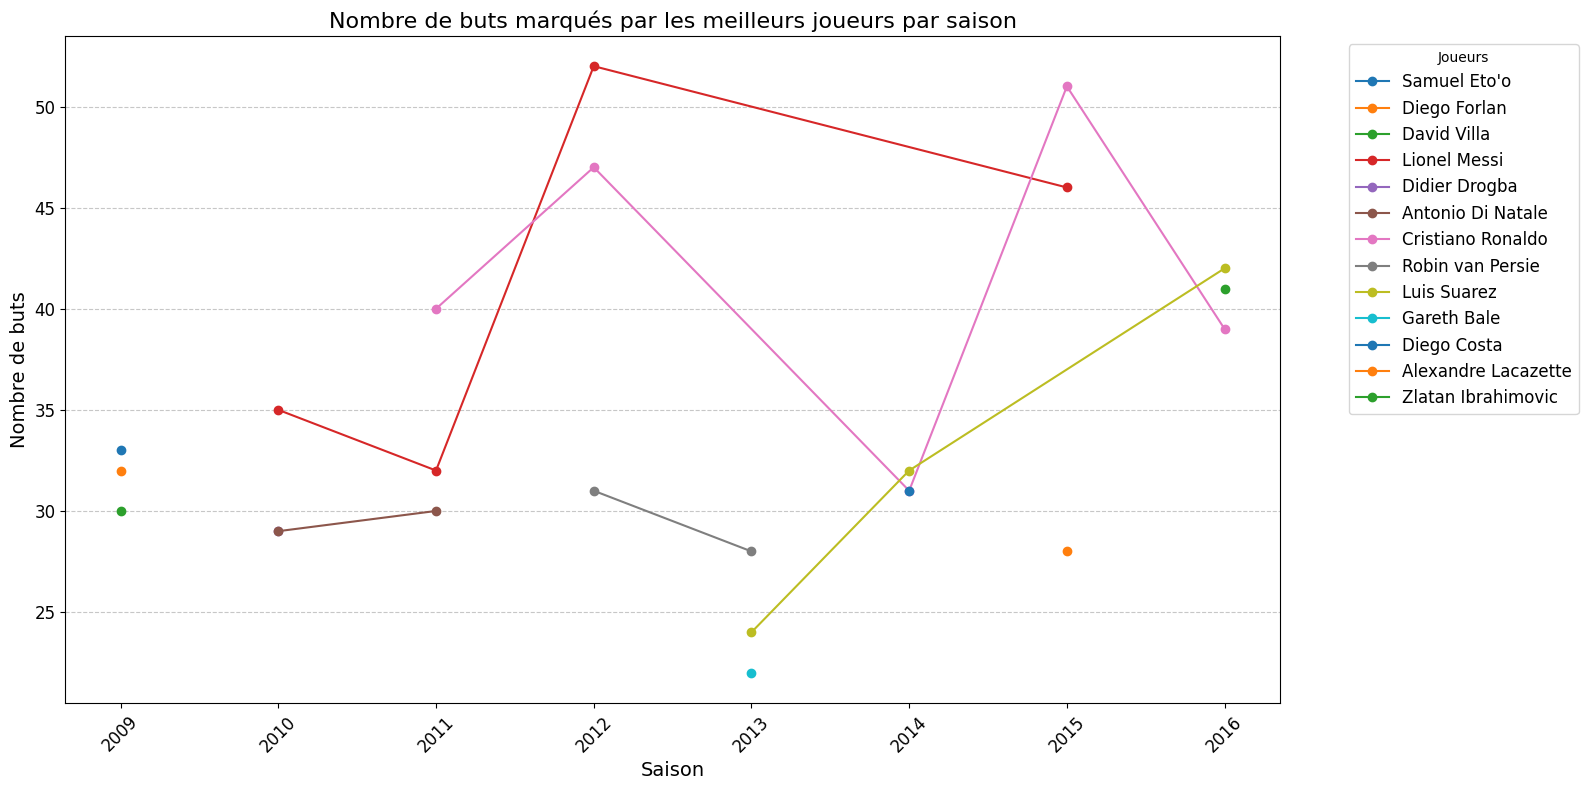

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
table_player['season'] = table_player['season'].str.split('/').str[1].astype(float)

# Groupement par joueur et saison pour calculer la somme des buts et des assists
table_player_grouped = table_player.groupby(['player_name', 'season']).agg({
    'assist': 'sum',
    'goals': 'sum'
}).reset_index()

# Trier les données par saison, puis par buts et assists (décroissant pour les deux)
table_player_grouped_sorted = table_player_grouped.sort_values(
    by=['season', 'goals', 'assist'], ascending=[True, False, False]
)

# Prendre les 3 meilleurs joueurs par saison
top_3_players_per_season = table_player_grouped_sorted.groupby('season').head(3).reset_index(drop=True)

# Conversion de la colonne 'season' en type catégoriel ordonné

# Affichage des données pour validation
print(top_3_players_per_season)

# Configurer la figure pour le tracé
plt.figure(figsize=(16, 8))

# Tracer les données pour chaque joueur
for player in top_3_players_per_season['player_name'].unique():
    player_data = top_3_players_per_season[top_3_players_per_season['player_name'] == player]
    plt.plot(player_data['season'], player_data['goals'], marker='o', label=player)

# Ajouter des labels et un titre
plt.title('Nombre de buts marqués par les meilleurs joueurs par saison', fontsize=16)
plt.xlabel('Saison', fontsize=14)
plt.ylabel('Nombre de buts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Joueurs', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Ajouter une grille pour améliorer la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
table_player_final_grouped = table_player_attribute_merge.groupby(['player_api_id','player_name']).agg({
    'Double Yellow Cards':'sum',
    'Yellow Cards':'sum',
    'Red Cards':'sum',
    'assist': 'sum',                
    'goals': 'sum',                 
    'overall_rating': 'mean',       
    'potential': 'mean',            
    'attacking_work_rate': lambda x: x.mode()[0] if not x.mode().empty else None,  
    'defensive_work_rate': lambda x: x.mode()[0] if not x.mode().empty else None,
    'crossing': 'mean',            
    'finishing': 'mean',            
    'heading_accuracy': 'mean',     
    'short_passing': 'mean',        
             
    'dribbling': 'mean',                           
    'free_kick_accuracy': 'mean',   
    'long_passing': 'mean',         
    'ball_control': 'mean',         
    'acceleration': 'mean',         
    'sprint_speed': 'mean',         
    'reactions': 'mean',            
    'shot_power': 'mean',           
    'jumping': 'mean',              
    'strength': 'mean',            
    'long_shots': 'mean',           
    'aggression': 'mean',           
    'interceptions': 'mean',        
    'positioning': 'mean',          
    'vision': 'mean',               
    'penalties': 'mean',            
    'marking': 'mean',              
    'standing_tackle': 'mean',      
    'sliding_tackle': 'mean',       
    'gk_diving': 'mean',            
    'gk_handling': 'mean',          
    'gk_kicking': 'mean',           
    'gk_positioning': 'mean',       
    'gk_reflexes': 'mean',          
    'role': lambda x: x.mode()[0] if not x.mode().empty else None,  # Mode de role
    'performance_score': 'mean'     # Moyenne des performances
})

# Afficher le résultat


In [ ]:
table_player_final_grouped.columns

Index(['Double Yellow Cards', 'Yellow Cards', 'Red Cards', 'assist', 'goals',
       'overall_rating', 'potential', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'dribbling', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'reactions',
       'shot_power', 'jumping', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'role',
       'performance_score'],
      dtype='object')

In [ ]:
table_player_final_grouped.head()

,,Double Yellow Cards,Yellow Cards,Red Cards,assist,goals,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,role,performance_score
player_api_id,player_name,,,,,,,,,,,,,,,,,,,,,
2625,"Patryk Rachwal,18",0.0,0.0,0.0,0,0,60.142857,61.142857,medium,medium,50.142857,...,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571,Defender,42.464286
2752,Diego Mainz,0.0,231.0,21.0,0,0,69.380952,70.380952,medium,medium,36.428571,...,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238,Defender,48.659524
2768,Jose Dorado,0.0,273.0,21.0,21,0,69.285714,70.571429,medium,medium,42.238095,...,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238,Defender,49.967857
2770,Ignacio Gonzalez,0.0,0.0,0.0,0,0,71.133333,73.533333,medium,low,61.866667,...,30.200000,37.533333,25.000000,8.666667,15.666667,27.200000,16.333333,17.000000,Midfielder,54.894444
2790,Alberto Rey,20.0,140.0,0.0,10,0,70.200000,75.800000,None,7,70.000000,...,74.600000,74.600000,69.000000,8.000000,17.000000,59.000000,16.600000,17.400000,Defender,49.200000


In [ ]:
table_player_final_grouped.describe()

,Double Yellow Cards,Yellow Cards,Red Cards,assist,goals,overall_rating,potential,crossing,finishing,heading_accuracy,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,performance_score
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,...,11060.000000,11060.000000,11060.000000,10582.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,8.499186,327.147649,8.758409,40.928210,56.114195,66.821220,72.090199,52.853836,47.862158,56.100191,...,53.683865,46.231506,49.440718,47.124658,14.911480,16.676640,23.015346,16.750479,17.055233,46.946752
std,40.855019,1076.366248,41.694095,138.152436,243.514422,6.237737,5.800310,16.169993,18.109541,15.655452,...,13.837461,20.055208,20.335997,20.591122,16.804823,15.472427,17.583857,15.692482,16.754692,4.651361
min,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,51.000000,6.000000,5.000000,8.000000,...,9.000000,5.000000,6.000000,5.000000,1.000000,2.000000,3.260870,2.000000,2.000000,31.866667
25%,0.000000,0.000000,0.000000,0.000000,0.000000,62.822193,68.000000,43.444444,32.444444,49.093168,...,44.852744,25.000000,29.000000,25.439236,7.768590,9.500000,11.000000,9.435619,9.381592,43.849519
50%,0.000000,5.000000,0.000000,0.000000,0.000000,66.722222,72.000000,56.296296,49.854111,58.803226,...,55.000000,50.000000,55.187500,52.163333,10.138410,12.500000,16.278556,12.500000,12.462912,46.840588
75%,0.000000,132.000000,0.000000,18.000000,0.000000,70.951630,76.000000,64.714286,63.055556,66.750000,...,63.929762,64.200000,67.000000,65.125000,13.000000,15.391304,27.301923,15.424451,15.384615,50.093604
max,828.000000,15180.000000,1140.000000,2314.000000,5486.000000,92.192308,95.230769,89.357143,92.230769,93.111111,...,92.000000,90.666667,90.200000,94.366667,89.863636,86.875000,89.000000,91.625000,90.954545,63.378788


In [ ]:
table_player_final_grouped.describe(include=['O'])

,attacking_work_rate,defensive_work_rate,role
count,10520,11060,11060
unique,8,19,4
top,medium,medium,Defender
freq,7360,7705,6882


In [ ]:
def changer_defensiveor_attacking_work(x):
    if str(x) not in ['medium','high','low']:
        return 'medium'
    else:
        return x

In [ ]:
table_player_final_grouped['defensive_work_rate'] = table_player_final_grouped['defensive_work_rate'].apply(changer_defensiveor_attacking_work)
table_player_final_grouped['attacking_work_rate'] = table_player_final_grouped['defensive_work_rate'].apply(changer_defensiveor_attacking_work)

In [ ]:
table_player_final_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11060 entries, (np.int64(2625), 'Patryk Rachwal,18') to (np.int64(750584), 'Alexandre Azevedo')
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Double Yellow Cards  11060 non-null  float64
 1   Yellow Cards         11060 non-null  float64
 2   Red Cards            11060 non-null  float64
 3   assist               11060 non-null  int64  
 4   goals                11060 non-null  int64  
 5   overall_rating       11060 non-null  float64
 6   potential            11060 non-null  float64
 7   attacking_work_rate  11060 non-null  object 
 8   defensive_work_rate  11060 non-null  object 
 9   crossing             11060 non-null  float64
 10  finishing            11060 non-null  float64
 11  heading_accuracy     11060 non-null  float64
 12  short_passing        11060 non-null  float64
 13  dribbling            11060 non-null  float64
 14  free_kick_accura

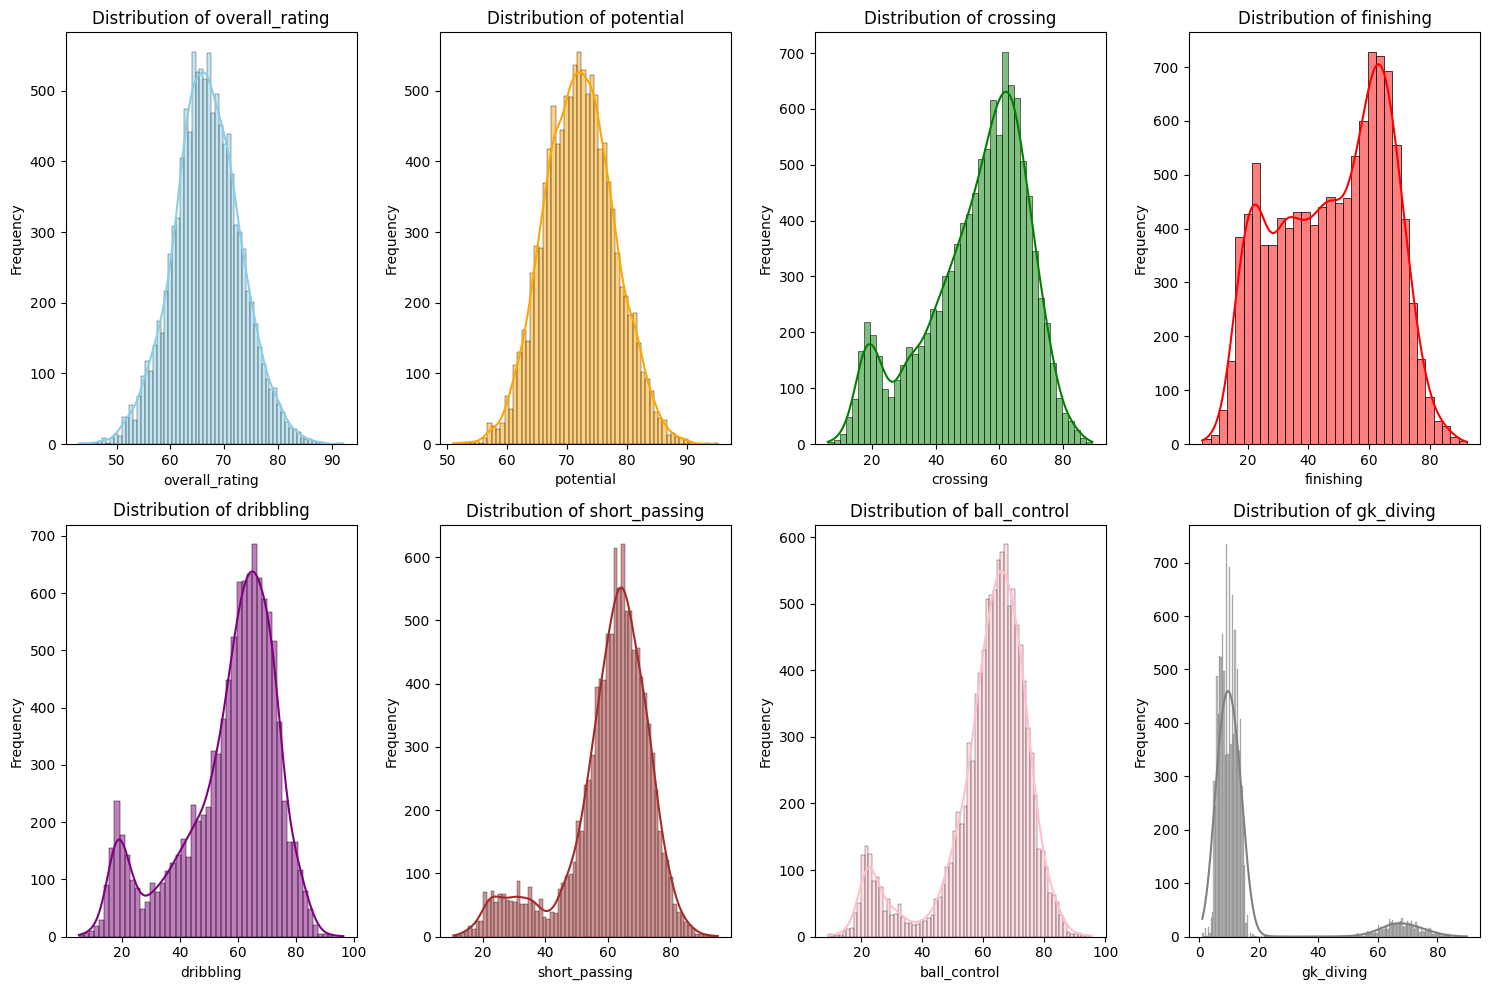

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des 10 variables les plus importantes sélectionnées pour l'analyse
important_features = [
    'overall_rating', 'potential', 
    'crossing', 'finishing', 'dribbling', 'short_passing', 
    'ball_control', 'gk_diving'
]

# Création des sous-intrigues pour afficher les distributions
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Tracer les distributions pour chaque variable importante
for i, feature in enumerate(important_features):
    sns.histplot(table_player_final_grouped[feature], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Ajustement des espaces entre les sous-intrigues
plt.tight_layout()
plt.show()


In [ ]:
table_player_final_grouped['sliding_tackle'] = table_player_final_grouped['sliding_tackle'].fillna(table_player_final_grouped['sliding_tackle'].mean())
table_player_final_grouped['vision'] = table_player_final_grouped['vision'].fillna(table_player_final_grouped['vision'].mean())
table_player_final_grouped['jumping'] = table_player_final_grouped['jumping'].fillna(table_player_final_grouped['jumping'].mean())

In [ ]:
table_player_final_grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11060 entries, (np.int64(2625), 'Patryk Rachwal,18') to (np.int64(750584), 'Alexandre Azevedo')
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Double Yellow Cards  11060 non-null  float64
 1   Yellow Cards         11060 non-null  float64
 2   Red Cards            11060 non-null  float64
 3   assist               11060 non-null  int64  
 4   goals                11060 non-null  int64  
 5   overall_rating       11060 non-null  float64
 6   potential            11060 non-null  float64
 7   attacking_work_rate  11060 non-null  object 
 8   defensive_work_rate  11060 non-null  object 
 9   crossing             11060 non-null  float64
 10  finishing            11060 non-null  float64
 11  heading_accuracy     11060 non-null  float64
 12  short_passing        11060 non-null  float64
 13  dribbling            11060 non-null  float64
 14  free_kick_accura

# analyser les equipes